# Метод дихотомии

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
eps = 0.0001
a0 = 2
b0 = 200

In [3]:
def f(x):
    return (x - 15) ** 2 + 5

In [4]:
def iterate(a, b, sigma):
    x1 = (a + b) / 2 - sigma
    x2 = (a + b) / 2 + sigma
    if f(x1) < f(x2):
        return a, x2
    elif f(x1) > f(x2):
        return x1, b
    else:
        return x1, x2

In [5]:
def dichotomy(a, b, eps):
    minimum = (a + b) / 2
    length = b - a
    sigma = eps / 2
    x = (a + b) / 2
    data = [[a, b, length, x, f((a + b) / 2)]]
    iteration = 0
    while length > eps:
        a_i, b_i = iterate(a, b, sigma)
        if abs(a_i - a) < eps and abs(b_i - b) < eps:
            break
        a, b = a_i, b_i
        length = b - a
        x = (a + b) / 2
        iteration += 1
        data.append([a, b, length, x, f(x)])
    return data, iteration

In [6]:
data = dichotomy(a0, b0, eps)[0]

In [7]:
df = pd.DataFrame(data, columns=['a', 'b', 'length', 'x', 'f(x)'])

In [8]:
df.to_excel('dichotomy.xlsx')

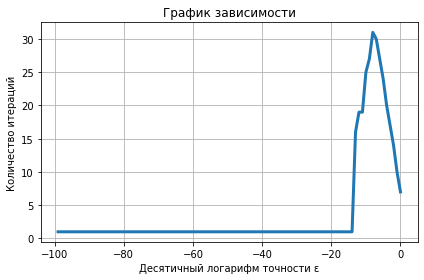

In [9]:
reference_points = [(math.log10(10 ** (-1 * p)), dichotomy(a0, b0, (10 ** (-1 * p)))[1]) for p in range(100)]

fig = plt.figure()
plt.title('График зависимости')
plt.xlabel('Десятичный логарифм точности ε')
plt.ylabel('Количество итераций')
plt.plot([point[0] for point in reference_points], [point[1] for point in reference_points], lw=3)
plt.tight_layout()
plt.grid()
plt.show()